# Fordgobike 2019-02 dataset Data Exploration
## by Divya Prasanth P

## Investigation Overview

> I intend to investigate how bike ride duration is associated with day of the week, hour of the day, rider's gender, age and user_type

## Dataset Overview

> The fordgobike-tripdata dataset provides information on each bike ride made in the fordgobike program from February 1st, 2019 to March 1st, 2019. It contains information such as starting station details, ending station details, starting time, ending time, duration of the ride and information about the rider such as rider's gender, birth_year, program subscription type for about 183K rides made. There are about 183k rows and 16 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data/bike_ride_clean.csv')
df_normal = df.query('duration_min <= 50')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Correlation Grid

> The following grid and plot shows that there is very less correlation between age and duration. Hence age is not considered further for analysis

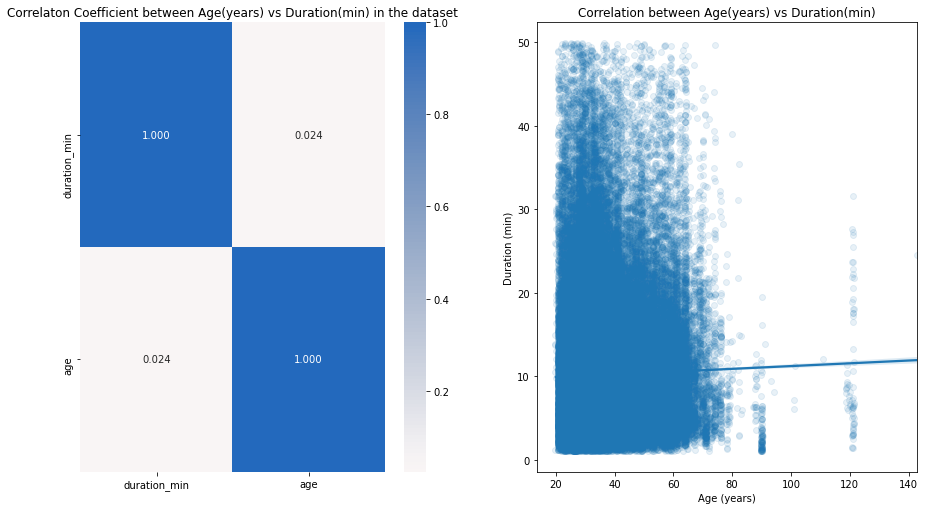

In [3]:
#correlation plot
net_numerical_vars = ['duration_min', 'age']

plt.figure(figsize=[ 15, 8.27])
plt.subplot(1,2,1)
sb.heatmap(df_normal[net_numerical_vars].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)
plt.title('Correlaton Coefficient between Age(years) vs Duration(min) in the dataset');

plt.subplot(1,2,2)
sb.regplot(data=df_normal, x='age', y='duration_min', x_jitter=0.3, scatter_kws={'alpha':1/10})
plt.xlabel('Age (years)')
plt.ylabel('Duration (min)');
plt.title('Correlation between Age(years) vs Duration(min)');

## Duration vs Gender

> The male population is significantly larger than the female and other population. However the median duration of female is higher than the other categories.

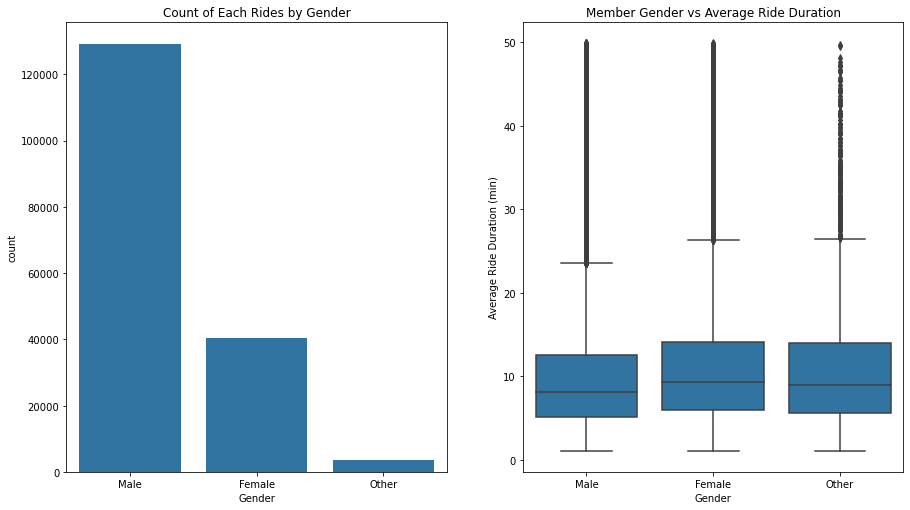

In [4]:
#plotting bar chart for user gender categories
plt.figure(figsize=[ 15, 8.27])

color = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.countplot(data=df_normal, x='member_gender', color=color, order=['Male', 'Female', 'Other']);
plt.xlabel('Gender')
plt.title('Count of Each Rides by Gender')

plt.subplot(1,2,2)
sb.boxplot(data=df_normal, x='member_gender', y='duration_min', color=color);
plt.title('Member Gender vs Average Ride Duration')
plt.xlabel('Gender')
plt.ylabel('Average Ride Duration (min)');


## Now let us concentrate on how ride duration is associated with day of week, hour of day and user type
It looks like subscriber based users ride more during the weekdays and weekends than the customer based users. During weekdays most number of rides occur between 8am to 9am and 4pm to 5pm. Further looking at data individually by user_type, customer based users prefer to travel during the weekends as well and subscriber based users travel more during the weekdays and prefer less to travel during the weekends.


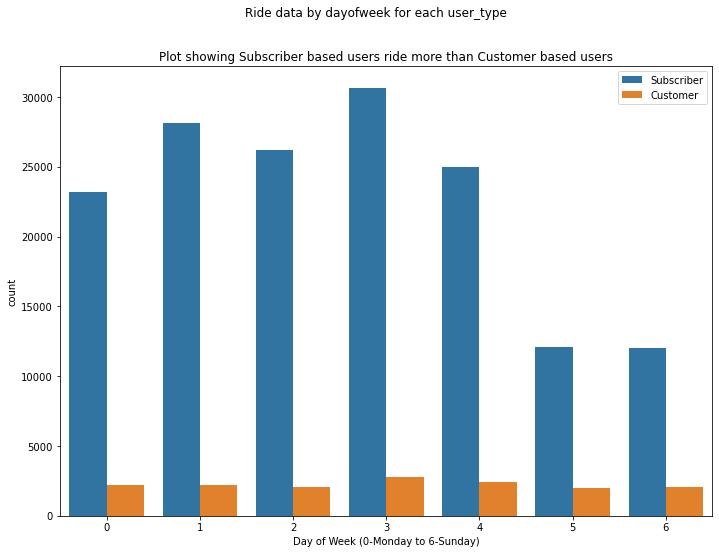

In [5]:
#lets plot now distribution of dayofweek vs usertype
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data=df_normal, x='start_dayofweek', hue='user_type');
plt.suptitle('Ride data by dayofweek for each user_type');
plt.title('Plot showing Subscriber based users ride more than Customer based users')
plt.legend(loc='upper right')
plt.xlabel('Day of Week (0-Monday to 6-Sunday)');

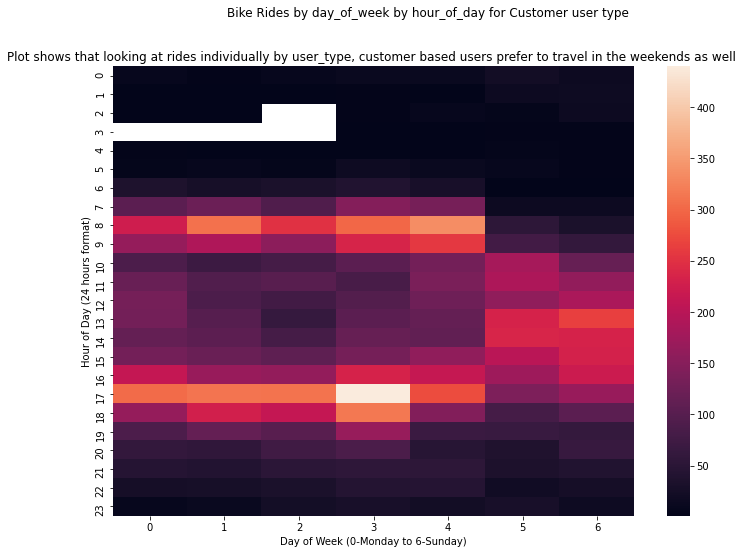

In [6]:
#heatmap plot btw start_dayofweek vs start_hour vs Customer type users
df_normal_customer = df_normal.query('user_type == "Customer"')
counts = df_normal_customer.groupby(['start_dayofweek','start_hour']).size()

#using reset_index to convert the pandas series to a dataframe
counts = counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
counts = counts.pivot(index = 'start_hour', columns = 'start_dayofweek', values = 'count')

#plotting heatmap
plt.figure(figsize=[ 11.69, 8.27])
sb.heatmap(counts);
plt.suptitle('Bike Rides by day_of_week by hour_of_day for Customer user type');
plt.title('Plot shows that looking at rides individually by user_type, customer based users \
prefer to travel in the weekends as well ')
plt.xlabel('Day of Week (0-Monday to 6-Sunday)')
plt.ylabel('Hour of Day (24 hours format)');

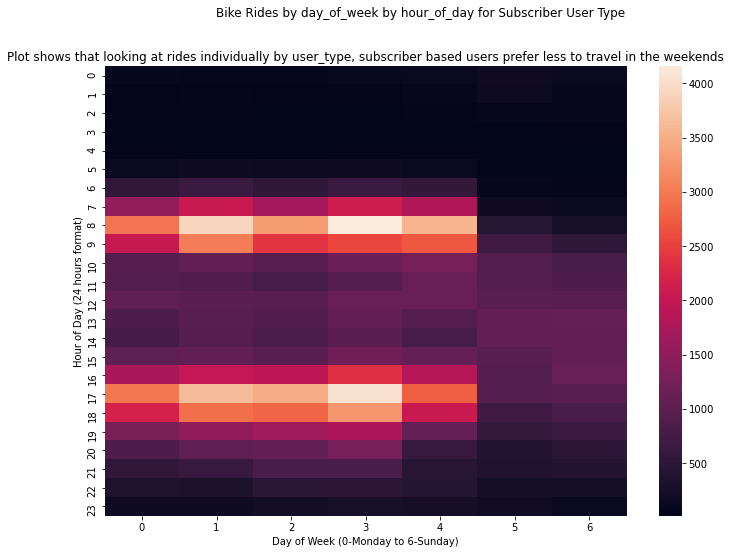

In [7]:
#heatmap plot btw start_dayofweek vs start_hour vs Subscriber type users

df_normal_subscriber = df_normal.query('user_type == "Subscriber"')
counts = df_normal_subscriber.groupby(['start_dayofweek','start_hour']).size()

#using reset_index to convert the pandas series to a dataframe
counts = counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
counts = counts.pivot(index = 'start_hour', columns = 'start_dayofweek', values = 'count')

#plotting heatmap
plt.figure(figsize=[ 11.69, 8.27])
sb.heatmap(counts);
plt.suptitle('Bike Rides by day_of_week by hour_of_day for Subscriber User Type');
plt.title('Plot shows that looking at rides individually by user_type, subscriber based users \
prefer less to travel in the weekends')
plt.xlabel('Day of Week (0-Monday to 6-Sunday)')
plt.ylabel('Hour of Day (24 hours format)');

## Conclusions
We wanted to find out how the duration of the each bike ride is associated is day_of_week, hour_of_day, member's gender, age and user_type. However after the investigation, we found that:
<ol>
    <li>Age had very little correlation correlation with durations_mins. Hence, it was opted out for further ivestigation</li>
    <li>While the male population usage is very larger when compared to female and other population, the median duration of female is larger than the other two categories</li>
    <li>It looks like subscriber based users ride more during the weekdays and weekends than the customer based users. During weekdays most number of rides occur between 8am to 9am and 4pm to 5pm. Further looking at data individually by user_type, customer based users prefer to travel during the weekends as well and subscriber based users travel more during the weekdays and prefer less to travel during the weekends.</li>
</ol>